Fase 3: Regressão Polinomial - Overfitting
Nesta fase iremos considerar a Regressão Polinomial com uma variável x.  A Regressão Polinomial encaixa uma relação não linear entre o valor de x e o valor correspondente de y.

In [56]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

a) Baixe o arquivo data_preg.mat ou data_preg.csv. A primeira coluna representa os valores de x e a segunda coluna representa os valores de y.

In [57]:
file_path = "data_preg.csv"
df = pd.read_csv(file_path, header=None)
df.columns = ["X", "Y"]
X = df["X"].values.reshape(-1, 1)
Y = df["Y"].values.reshape(-1, 1)

b) Faça o Gráfico de dispersão dos dados.

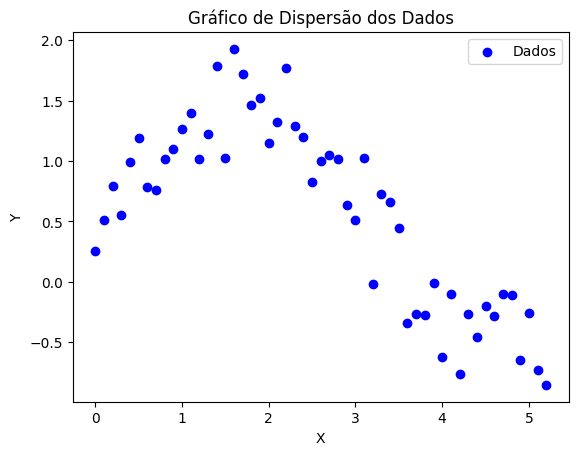

In [58]:
def plot_grafico_dispersao_vazio(x, y):
    plt.scatter(x, y, color="blue", label="Dados")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gráfico de Dispersão dos Dados")
    plt.legend()
    plt.show()
plot_grafico_dispersao_vazio(X, Y)

c) Use a função polyfit para gerar a linha de regressão para N = 1 e trace-o no gráfico de dispersão na cor vermelha (plot (x, y, 'r')). (Observe que nesta função a numeração coeficiente é invertida! β0=βN , β1=βN−1 , β2=βN−2 , ...βN=β0)

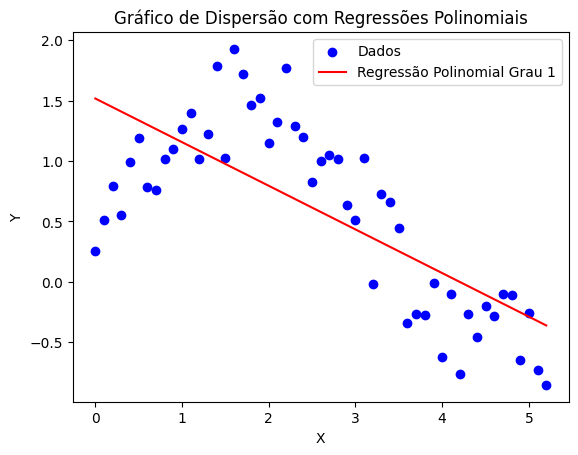

In [59]:
num_polinomios = 1
def getBeta(x, y, N=1):
    beta = np.polyfit(x.flatten(), y.flatten(), N)
    return beta

def regressao_polinomial(x, beta):
    # Fórmula: y = 𝛽0 + 𝛽1X + 𝛽2X2 + 𝛽3X3 + …+ 𝛽 NXN
    y_pred = np.zeros_like(x, dtype=float)
    for i in range(len(beta)):
        y_pred += beta[i] * x ** (len(beta) - 1 - i)
    return y_pred

def plot_grafico_dispersao(x, y, regressao = [], regressao_dict={}):
    plt.scatter(x, y, color="blue", label="Dados")
    if regressao_dict != {}:
        for grau, (r, cor) in regressao_dict.items():
            plt.plot(x, r, color=cor, label=f"Regressão Polinomial Grau {grau}")
    else:
        plt.plot(x, regressao, color="red", label=f"Regressão Polinomial Grau {num_polinomios}")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title("Gráfico de Dispersão com Regressões Polinomiais")
    plt.legend()
    plt.show()

beta = getBeta(X, Y, num_polinomios)

regressao = regressao_polinomial(X, beta)

plot_grafico_dispersao(X, Y, regressao, {})

d) Trace a linha de regressão para N = 2 no gráfico na cor verde. Para isso, você deverá calcular esta função y = 𝛽0 + 𝛽1X + 𝛽2X2 + 𝛽3X3 + …+ 𝛽 NXN, isto é, não pode usar a função pronta do python.

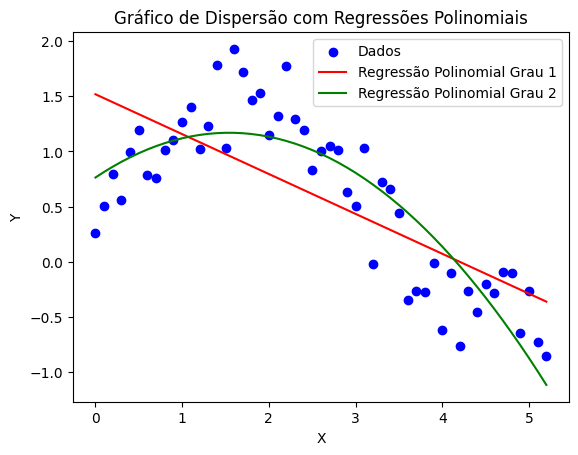

In [60]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green")
}

plot_grafico_dispersao(X, Y, [], regressoes)

e) Trace a linha de regressão para N = 3 no gráfico na cor preta.

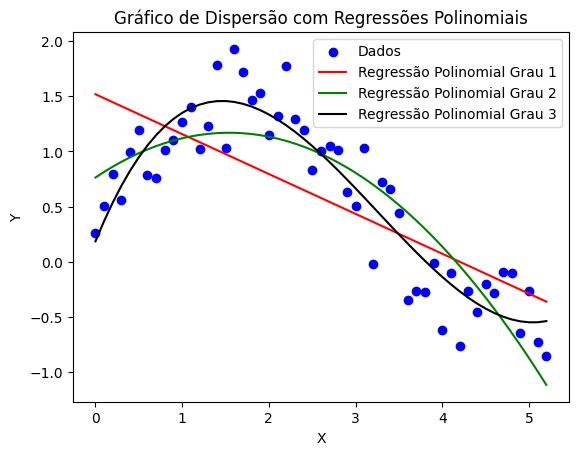

In [61]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green"),
    3: (regressao_polinomial(X, getBeta(X, Y, 3)), "black")
}

plot_grafico_dispersao(X, Y, [], regressoes)

f) Trace a linha de regressão para N = 8 no gráfico na cor amarela.

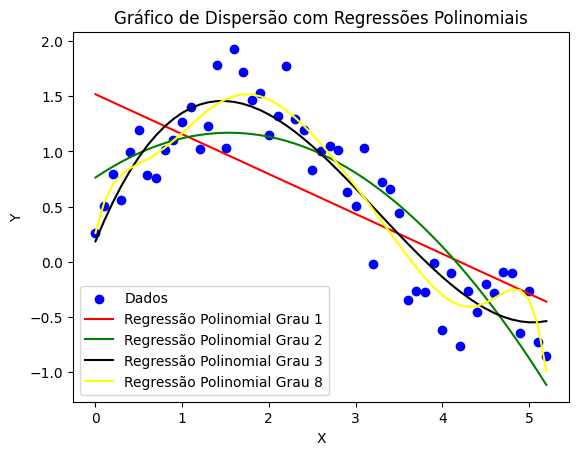

In [62]:
regressoes = {
    1: (regressao_polinomial(X, getBeta(X, Y, 1)), "red"),
    2: (regressao_polinomial(X, getBeta(X, Y, 2)), "green"),
    3: (regressao_polinomial(X, getBeta(X, Y, 3)), "black"),
    8: (regressao_polinomial(X, getBeta(X, Y, 8)), "yellow")
}

plot_grafico_dispersao(X, Y, [], regressoes)